<a href="https://www.kaggle.com/code/yutodennou/tips-try-prophet-for-beginners?scriptVersionId=147844060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🗃️Import Library

In [1]:
!pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import io

# 🔍Import data

In [4]:
# Example Data
! wget https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv -O peyton_manning.csv

--2023-10-24 14:45:53--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86845 (85K) [text/plain]
Saving to: ‘peyton_manning.csv’

peyton_manning.csv  100%[===================>]  84.81K  --.-KB/s    in 0.03s   

2023-10-24 14:45:54 (3.13 MB/s) - ‘peyton_manning.csv’ saved [86845/86845]



# 🎓Quick look

In [5]:
df = pd.read_csv('peyton_manning.csv')

In [6]:
df.head(10)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [7]:
df.tail(10)

,ds,y
2895,2016-01-11,8.470730
2896,2016-01-12,8.135054
2897,2016-01-13,8.067149
2898,2016-01-14,8.023552
2899,2016-01-15,8.021913
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


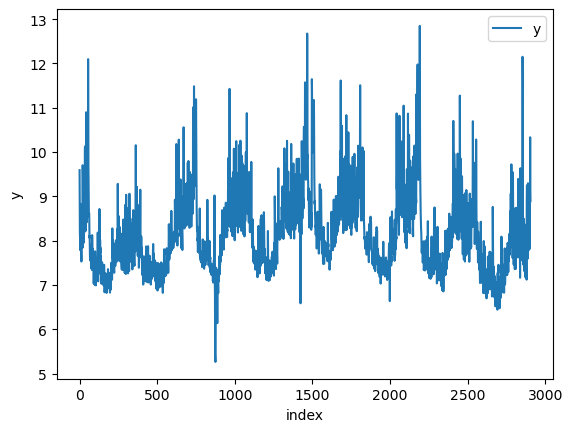

In [8]:
df.plot()
plt.xlabel('index')
plt.ylabel('y')
plt.show()

# 📈Try Prophet

In [9]:
# Model Instance
model = Prophet()
model.fit(df)

14:45:56 - cmdstanpy - INFO - Chain [1] start processing
14:45:57 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Set the Period for Train
future_df = model.make_future_dataframe(365)
# Predict
forecast_df = model.predict(future_df)
forecast_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.046470,8.247904,9.490781,8.046470,8.046470,0.803098,0.803098,0.803098,0.352292,0.352292,0.352292,0.450805,0.450805,0.450805,0.0,0.0,0.0,8.849568
1,2007-12-11,8.044902,7.983681,9.224796,8.044902,8.044902,0.553141,0.553141,0.553141,0.119633,0.119633,0.119633,0.433508,0.433508,0.433508,0.0,0.0,0.0,8.598043
2,2007-12-12,8.043334,7.790086,9.034035,8.043334,8.043334,0.350469,0.350469,0.350469,-0.066677,-0.066677,-0.066677,0.417146,0.417146,0.417146,0.0,0.0,0.0,8.393803
3,2007-12-13,8.041767,7.757564,8.986866,8.041767,8.041767,0.329938,0.329938,0.329938,-0.072228,-0.072228,-0.072228,0.402166,0.402166,0.402166,0.0,0.0,0.0,8.371704
4,2007-12-14,8.040199,7.786257,8.986565,8.040199,8.040199,0.319399,0.319399,0.319399,-0.069574,-0.069574,-0.069574,0.388973,0.388973,0.388973,0.0,0.0,0.0,8.359597


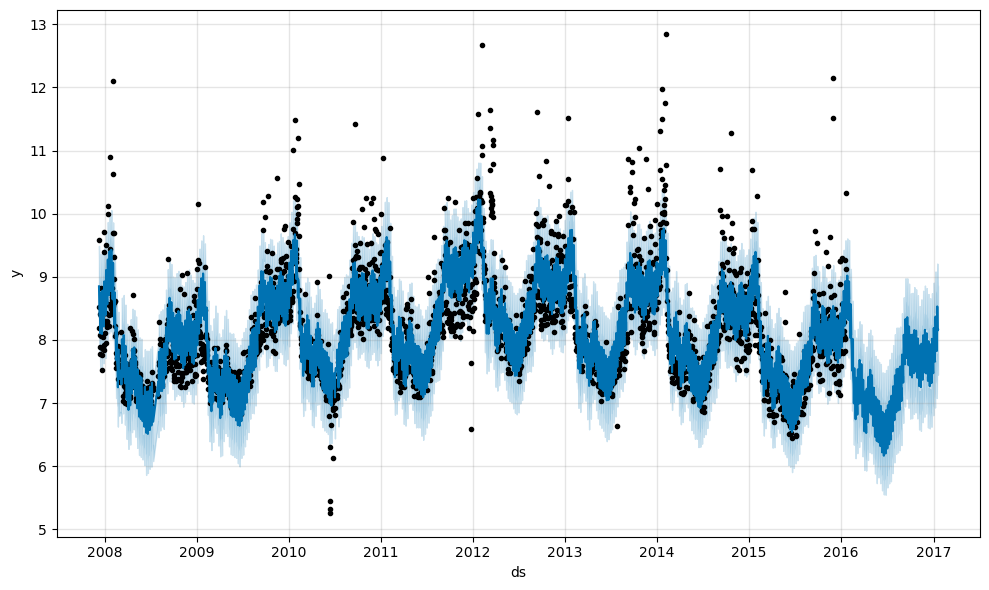

In [11]:
model.plot(forecast_df)
plt.show()

In [12]:
# Superbowl Data
events_csv = '''holiday, ds, lower, upper
superbowl, 2007-02-04, 0, 1
superbowl, 2008-02-03, 0, 1
superbowl, 2009-02-01, 0, 1
superbowl, 2010-02-07, 0, 1
superbowl, 2011-02-06, 0, 1
superbowl, 2012-02-05, 0, 1
superbowl, 2013-02-03, 0, 1
superbowl, 2014-02-02, 0, 1
superbowl, 2015-02-01, 0, 1
superbowl, 2016-02-07, 0, 1
superbowl, 2017-02-05, 0, 1
superbowl, 2018-02-04, 0, 1
superbowl, 2019-02-03, 0, 1
superbowl, 2020-02-02, 0, 1
superbowl, 2021-02-07, 0, 1
superbowl, 2022-02-06, 0, 1
superbowl, 2023-02-05, 0, 1
superbowl, 2024-02-04, 0, 1
'''

event_df = pd.read_csv(io.StringIO(events_csv))
event_df.head()

,holiday,ds,lower,upper
0,superbowl,2007-02-04,0,1
1,superbowl,2008-02-03,0,1
2,superbowl,2009-02-01,0,1
3,superbowl,2010-02-07,0,1
4,superbowl,2011-02-06,0,1


In [13]:
event_df = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime([
        '2007-02-04',
        '2008-02-03',
        '2009-02-01',
        '2010-02-07',
        '2011-02-06',
        '2012-02-05',
        '2013-02-03',
        '2014-02-02',
        '2015-02-01',
        '2016-02-07',
        '2017-02-05',
        '2018-02-04',
        '2019-02-03',
        '2020-02-02',
        '2021-02-07',
        '2022-02-06',
        '2023-02-05',
        '2024-02-04',
    ]),
    'upper_windw': 1
})

14:46:00 - cmdstanpy - INFO - Chain [1] start processing
14:46:00 - cmdstanpy - INFO - Chain [1] done processing


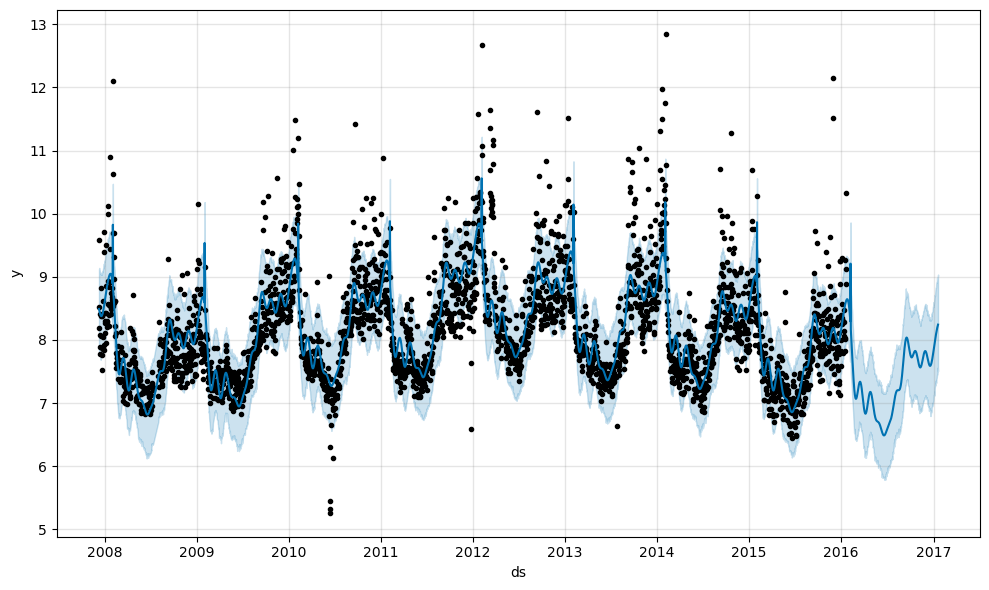

In [14]:
# Sellect the Seasonality
model = Prophet(daily_seasonality=False,
                weekly_seasonality=False,
                yearly_seasonality=True,
                holidays=event_df)
model.fit(df)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

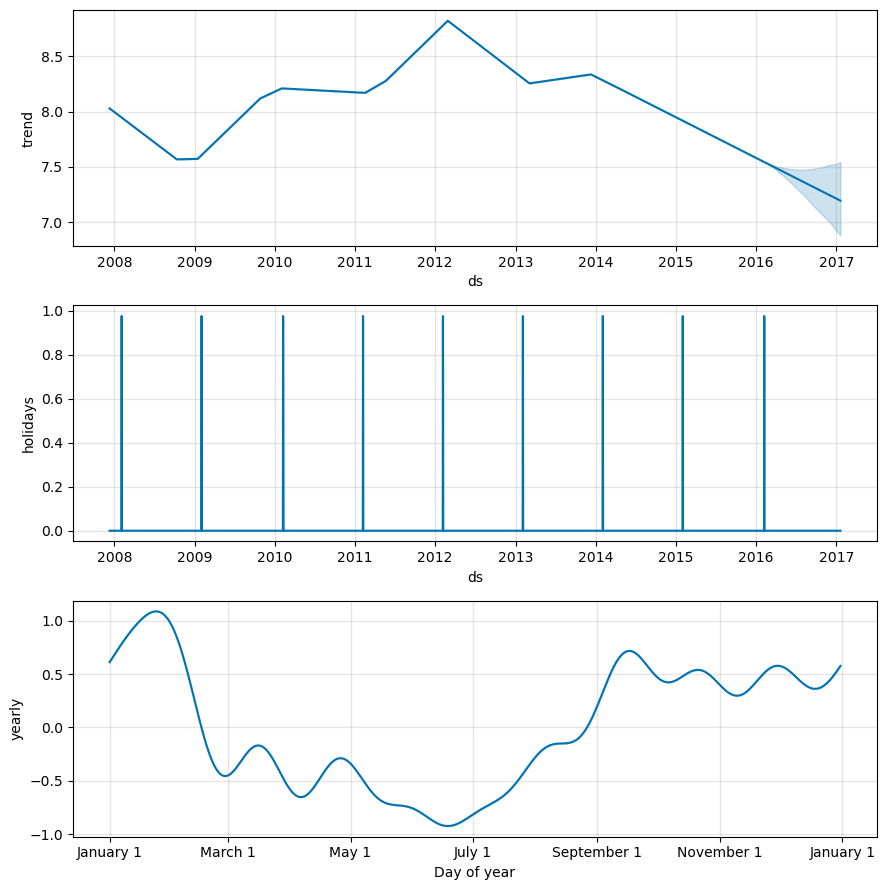

In [15]:
# Show Trend, Seasonal, Period Components
model.plot_components(forecast_df)
plt.show()

In [16]:
# Changepoint
changepoints_df = df.loc[model.changepoints.index]
changepoints_df['ds'] = changepoints_df['ds'].astype(str)
changepoints_df['delta'] = model.params['delta'].ravel()

# sns.set(style='whitegrid')
# ax = sns.factorplot(x='ds', y='delta', data=changepoints_df, kind='bar', height=6, aspect=2)
# ax.set_xticklabels(rotation=90)

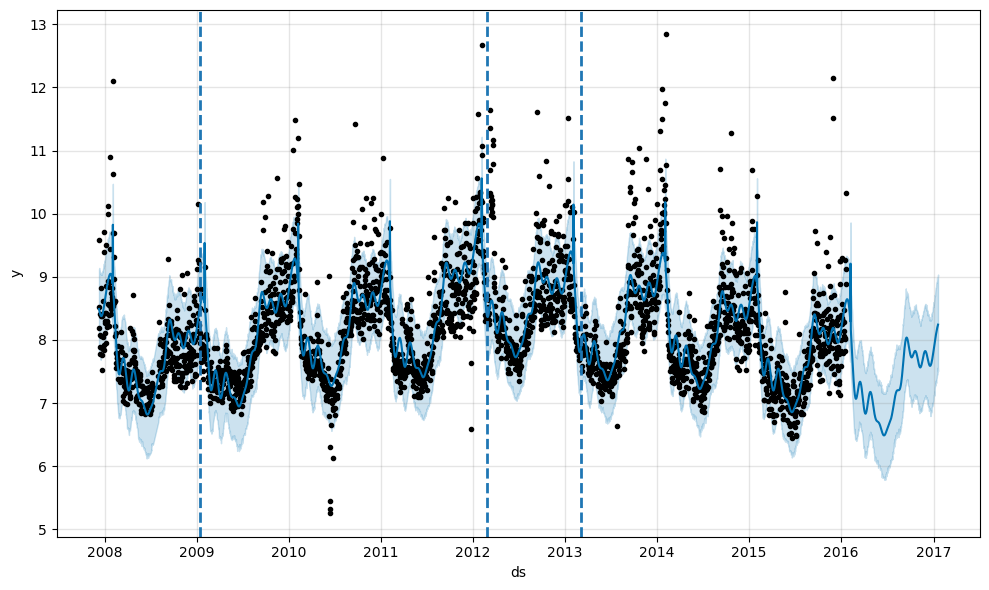

In [17]:
fig = model.plot(forecast_df)

tmp = changepoints_df[abs(changepoints_df['delta']) >= 0.4]
date_changepoints = tmp['ds'].astype('datetime64[ns]').reset_index(drop=True)

for dt in date_changepoints:
    plt.axvline(dt, ls='--', lw=2)
plt.show()